# 任务3：图像增强（去除底纹噪声，增加对比度）

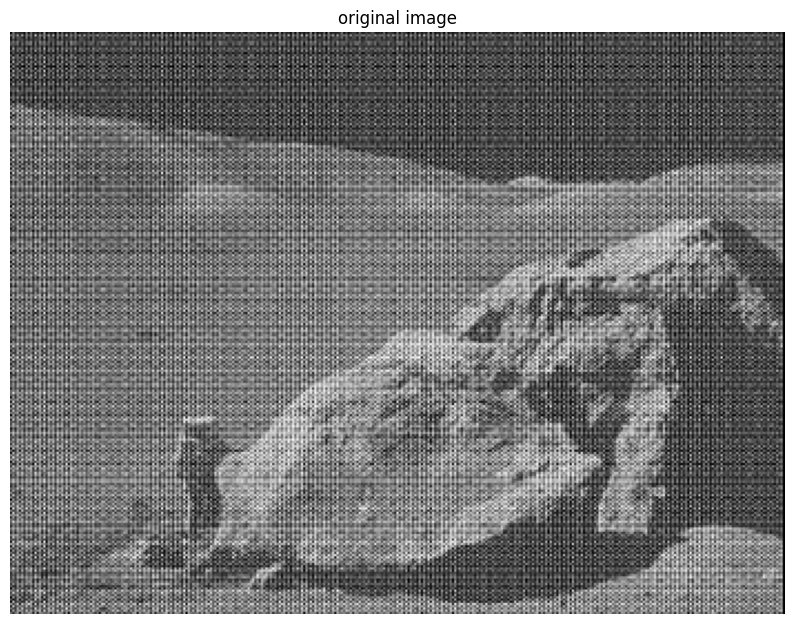

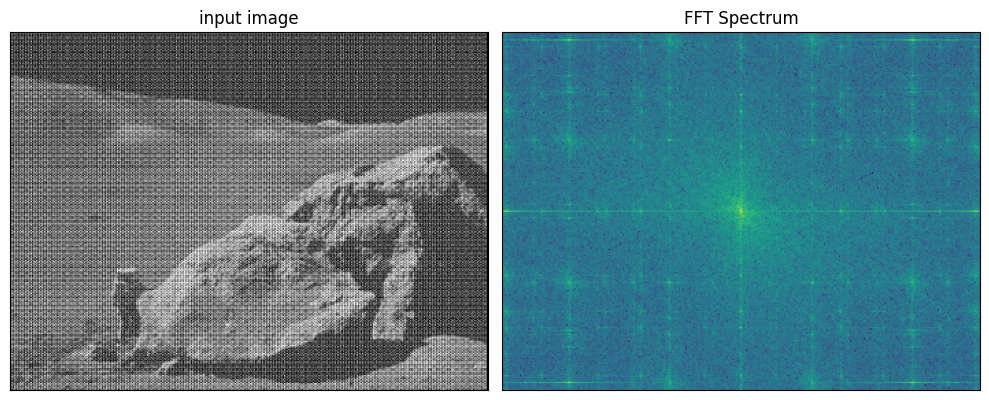

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 添加项目根目录到路径
sys.path.append(os.path.abspath('../'))

# 导入任务3的模块
from src.task3_enhance import (
    enhance_image, 
    display_fft_spectrum, 
    apply_notch_filter,
    display_images
)
from src.utils.image_io import read_image, save_image

# 读取图像
image_path = "/home/hac/image/data/input/scenery.png"  # 根据实际路径调整
image = read_image(image_path)

# 显示原始图像
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title('original image')
plt.axis('off')
plt.show()

# 显示FFT频谱，观察周期性噪声
magnitude_spectrum = display_fft_spectrum(image)

## notch滤波+CLAHE+锐化增强实验

### notch滤波

检测到的周期性噪声峰值数量: 150


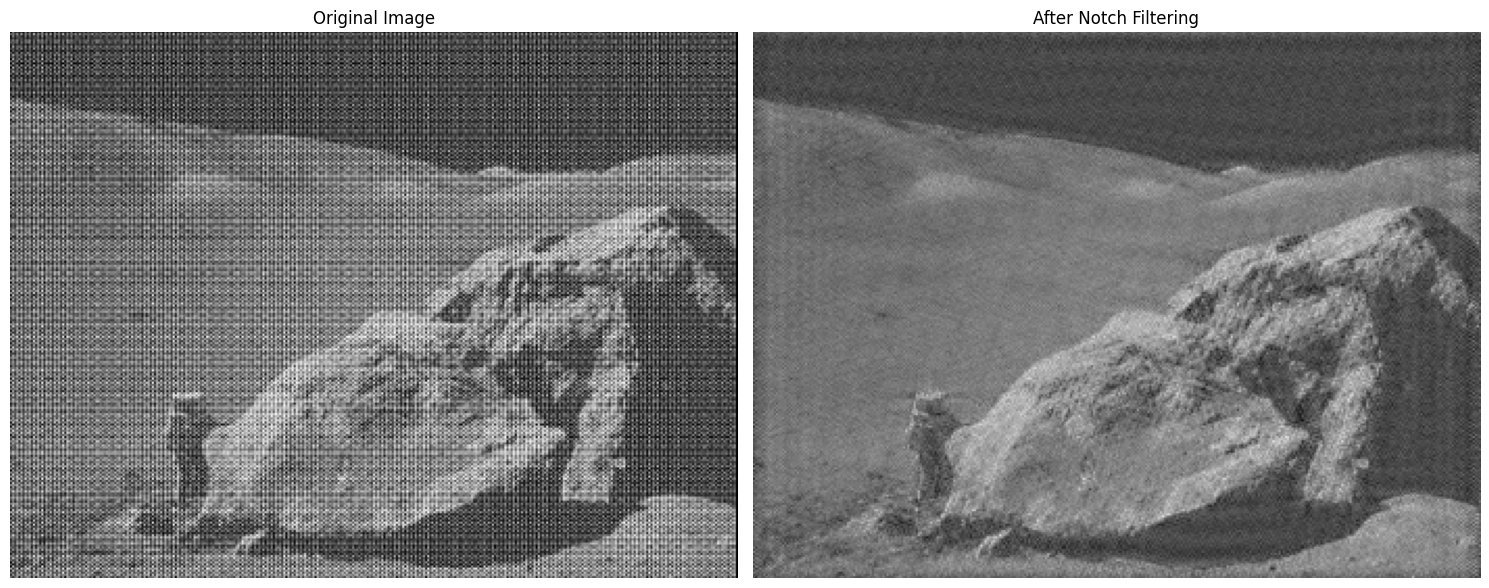

In [2]:
# 设置可调参数
threshold_factor = 0.2  # 噪声检测阈值
notch_radius = 8  # 陷波滤波器半径
max_peaks = 150
exclude_center_ratio = 0.1

# 先进行notch陷波滤波
from src.task3_enhance import detect_periodic_noise

# 检测周期性噪声峰值
peaks, magnitude_spectrum = detect_periodic_noise(image, 
                                                  threshold_factor=threshold_factor, 
                                                  max_peaks=max_peaks,
                                                  exclude_center_ratio=exclude_center_ratio)
print(f"检测到的周期性噪声峰值数量: {len(peaks)}")

# 应用notch陷波滤波去除周期性噪声
notch_filtered = apply_notch_filter(image, peaks, radius=notch_radius)

# 使用 display_images 显示原图和陷波滤波后图像对比，标题为英文
display_images([image, notch_filtered], ['Original Image', 'After Notch Filtering'])

### CLAHE

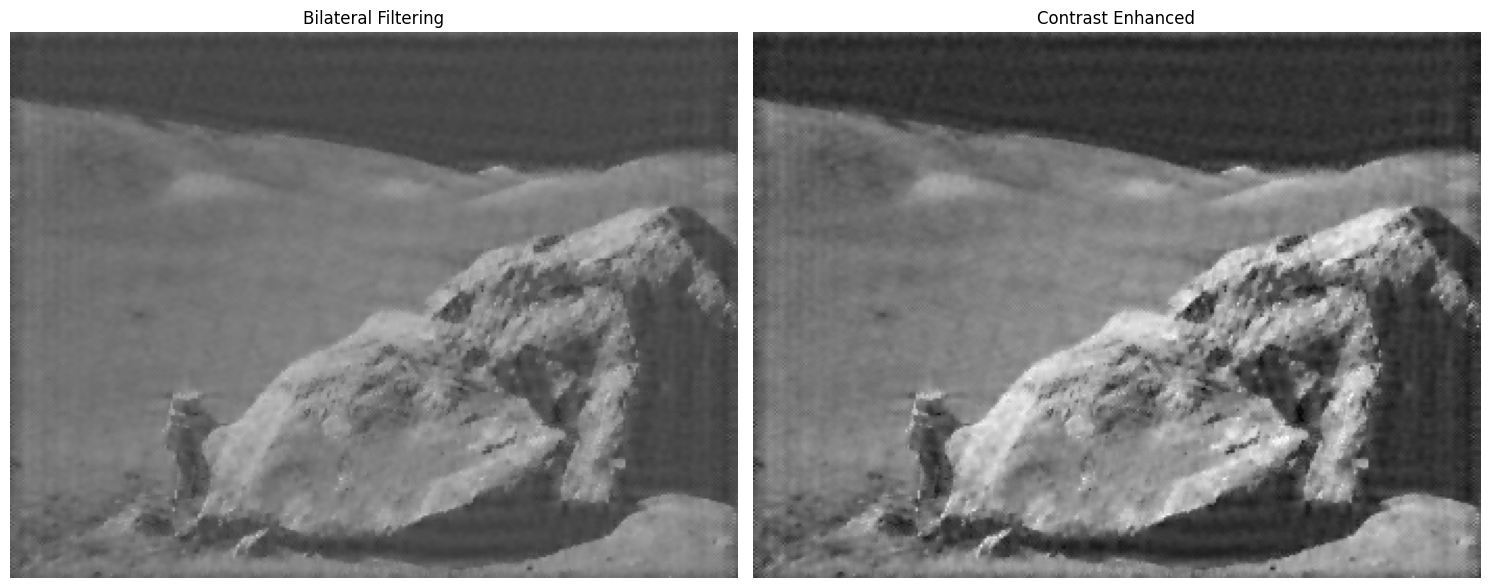

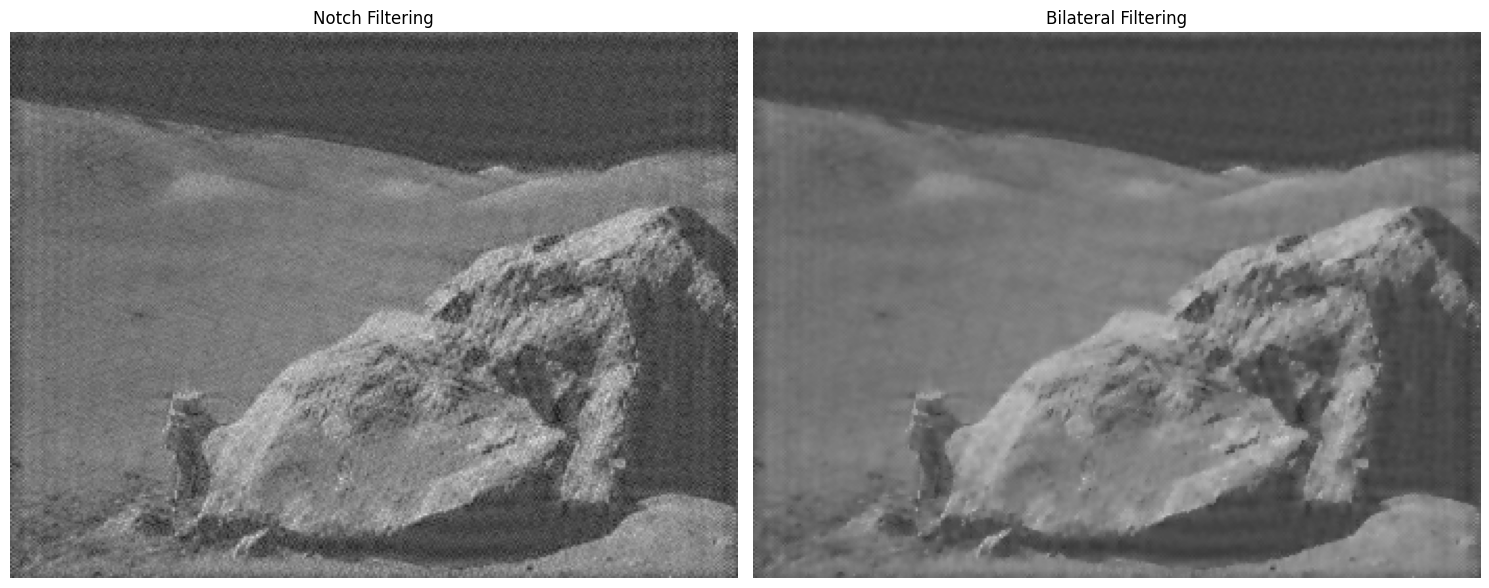

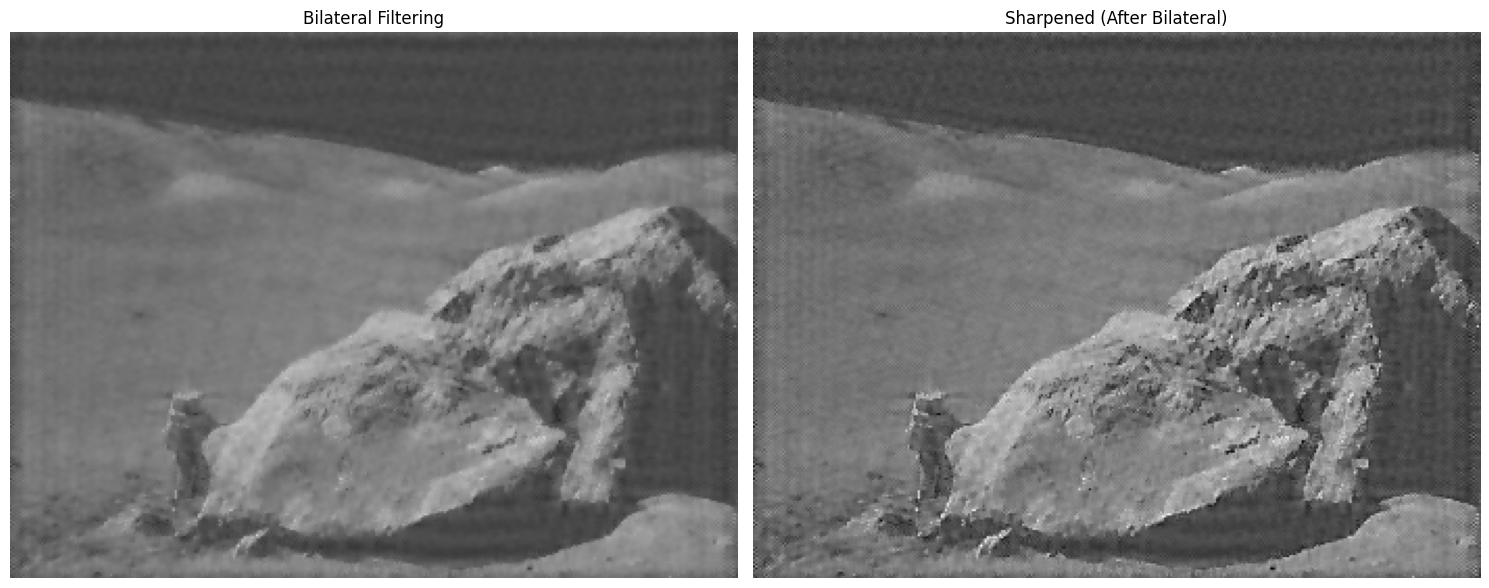

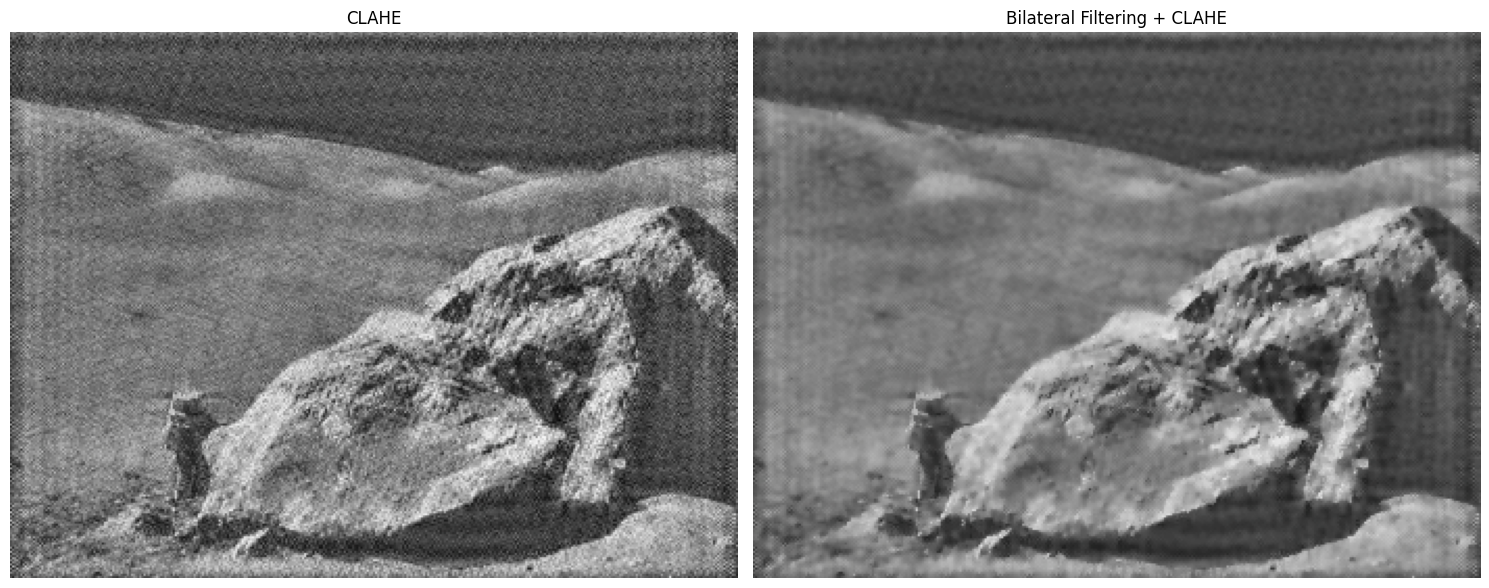

In [3]:
# 应用CLAHE增强对比度
from utils.filters import apply_clahe, bilateral_filter, unsharp_mask
from utils.color_space import adjust_contrast
clahe_clip_limit = 1.5
clahe_grid_size = (8, 8)

# 先对notch滤波后的图像进行双边滤波
bilateral_d = 4  # 双边滤波的直径
bilateral_sigma_color = 75  # 颜色空间的标准差
bilateral_sigma_space = 75  # 坐标空间的标准差

bilateral_filtered = bilateral_filter(notch_filtered, d=bilateral_d, sigma_color=bilateral_sigma_color, sigma_space=bilateral_sigma_space)

# 对双边滤波后的图像进行锐化
unsharp_strength = 1.5  # 锐化强度，可根据需要调整
sharpened_bilateral = unsharp_mask(bilateral_filtered, strength=unsharp_strength)

# 在双边滤波后增加对比度调整
contrast_factor = 1.6  # 对比度增强因子，可根据需要调整
contrast_enhanced = adjust_contrast(bilateral_filtered, factor=contrast_factor)
# 展示双边滤波与对比度增强后的对比
display_images([bilateral_filtered, contrast_enhanced], ['Bilateral Filtering', 'Contrast Enhanced'])


clahe_enhanced = apply_clahe(notch_filtered, clip_limit=clahe_clip_limit, tile_grid_size=clahe_grid_size)
clahe_bilter_enhanced = apply_clahe(bilateral_filtered, clip_limit=clahe_clip_limit, tile_grid_size=clahe_grid_size)

# 显示notch滤波 vs 双边滤波，双边滤波 vs CLAHE+双边滤波 两组对比
display_images([notch_filtered, bilateral_filtered], ['Notch Filtering', 'Bilateral Filtering'])
# 展示锐化效果
display_images([bilateral_filtered, sharpened_bilateral], ['Bilateral Filtering', 'Sharpened (After Bilateral)'])


display_images([clahe_enhanced, clahe_bilter_enhanced], ['CLAHE', 'Bilateral Filtering + CLAHE'])

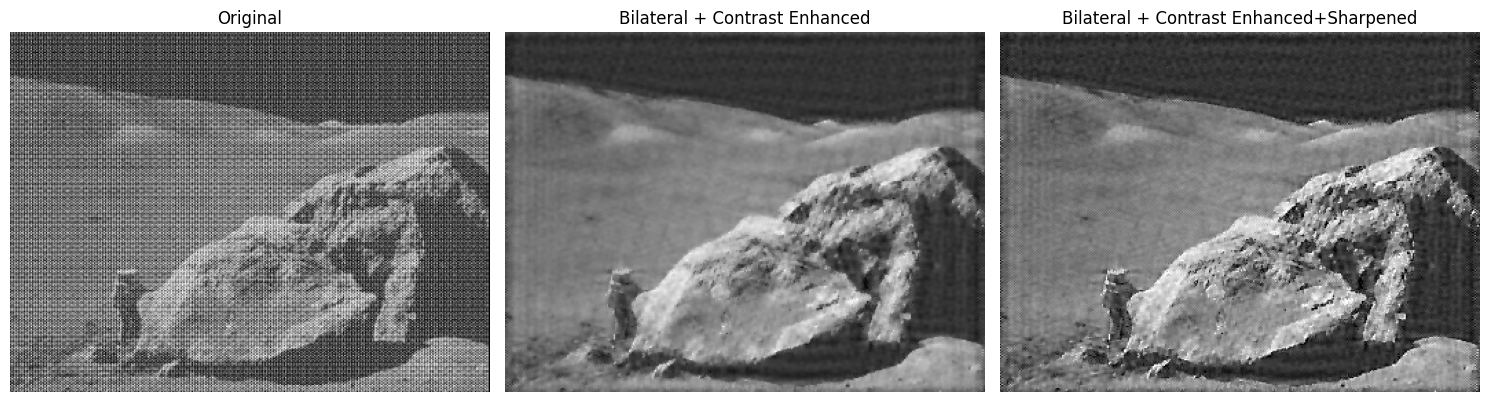

In [4]:
sharpened_contrast_bilateral = unsharp_mask(contrast_enhanced, kernel_size=5, strength=1.5)
display_images([image, contrast_enhanced, sharpened_contrast_bilateral], ['Original', 'Bilateral + Contrast Enhanced', 'Bilateral + Contrast Enhanced+Sharpened'], figsize=(15, 10))

In [5]:
# 保存增强后的图像
from src.config import ENHANCED_OUTPUT_PATH
save_image(sharpened_contrast_bilateral, ENHANCED_OUTPUT_PATH)

图像已保存至: /home/hac/image/data/output/enhanced_enhanced.png
